In [86]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader 
from torchvision import datasets, transforms 
from torchvision.utils import make_grid
import numpy as np 
import pandas as pd
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import os as os
%matplotlib inline

In [101]:
DATA_PATH = "utkcropped/utkcropped"
files = os.listdir(DATA_PATH)


age : int
gender : int => male = 0, female = 1
race : int => white = 0, black = 1, asian = 2, india = 3

In [88]:
data = []

for file in files:
    try : 
        age,gender,race,_ = file.split('_')
    except ValueError:
        print(f"Error: {file}")
        os.remove(os.path.join(DATA_PATH, file))
        continue
    
    data.append({
        "filename": file,   
        "age": int(age),
        "gender": int(gender),
        "race": int(race),
    })
    # img = plt.imread(os.path.join(DATA_PATH, file))
    # print(img.shape)
    # print(f"{age = }, {gender = }, {race = }")
    # plt.imshow(img)
    # plt.show()
    # break

data

[{'filename': '9_1_2_20161219204347420.jpg.chip.jpg',
  'age': 9,
  'gender': 1,
  'race': 2},
 {'filename': '36_0_1_20170117163203851.jpg.chip.jpg',
  'age': 36,
  'gender': 0,
  'race': 1},
 {'filename': '86_1_0_20170120225751953.jpg.chip.jpg',
  'age': 86,
  'gender': 1,
  'race': 0},
 {'filename': '26_1_0_20170116171048641.jpg.chip.jpg',
  'age': 26,
  'gender': 1,
  'race': 0},
 {'filename': '1_1_2_20161219154612988.jpg.chip.jpg',
  'age': 1,
  'gender': 1,
  'race': 2},
 {'filename': '52_0_1_20170117161018159.jpg.chip.jpg',
  'age': 52,
  'gender': 0,
  'race': 1},
 {'filename': '25_1_0_20170117134403373.jpg.chip.jpg',
  'age': 25,
  'gender': 1,
  'race': 0},
 {'filename': '16_0_0_20170104003740977.jpg.chip.jpg',
  'age': 16,
  'gender': 0,
  'race': 0},
 {'filename': '27_0_3_20170119210058457.jpg.chip.jpg',
  'age': 27,
  'gender': 0,
  'race': 3},
 {'filename': '36_0_3_20170119180245724.jpg.chip.jpg',
  'age': 36,
  'gender': 0,
  'race': 3},
 {'filename': '58_0_2_201701161937

In [89]:
with open("data.csv", "w") as f:
    f.write("filename,age,gender,race,emotion\n")
    f.writelines([f"{d['filename']},{d['age']},{d['gender']},{d['race']}\n" for d in data])

In [90]:
data = pd.read_csv("data.csv")
data.head()

,filename,age,gender,race,emotion
0,9_1_2_20161219204347420.jpg.chip.jpg,9,1,2,NaN
1,36_0_1_20170117163203851.jpg.chip.jpg,36,0,1,NaN
2,86_1_0_20170120225751953.jpg.chip.jpg,86,1,0,NaN
3,26_1_0_20170116171048641.jpg.chip.jpg,26,1,0,NaN
4,1_1_2_20161219154612988.jpg.chip.jpg,1,1,2,NaN


In [91]:
img = plt.imread(os.path.join(DATA_PATH, data["filename"][1]))

img = np.mean(img, axis=2, dtype=int)

# U,S,V = np.linalg.svd(img, full_matrices=True)

# # img = u[:50]*s[:50]*v[:50]

# plt.imshow(img,cmap="grey")
# plt.show()

In [92]:
# U = U[:200, :50]
# S = S[:50]
# V = V[:50, :200]
# S = np.diag(S)
# reconstructed_arr = np.dot(U, np.dot(S, V))
# print(reconstructed_arr.shape)
# plt.imshow(reconstructed_arr,cmap="grey")
# print()
# plt.show()

In [93]:
conv1 = nn.Conv2d(1,6,3,1)
conv2 = nn.Conv2d(6,16,3,1)

In [94]:
print(type(img))
img = torch.tensor(img.astype("float32"))
x = img.view(1,1,200,200)
print(x.shape)
x = F.relu(conv1(x))

<class 'numpy.ndarray'>
torch.Size([1, 1, 200, 200])


In [95]:
x = F.relu(conv2(x))


In [96]:
x.shape

torch.Size([1, 16, 196, 196])

In [97]:
x = F.max_pool2d(x,2,2)

In [98]:
x = F.max_pool2d(x,2,2)

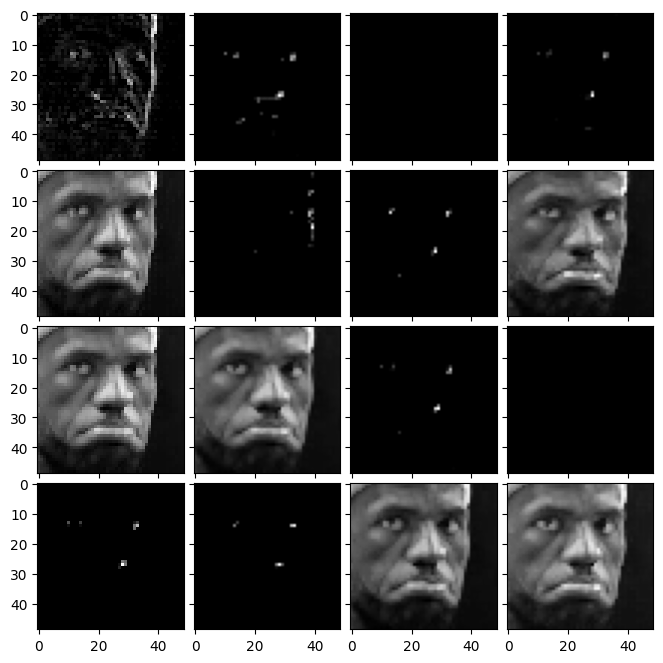

In [99]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for i in range(16):
    ax = grid[i]
    ax.imshow(x.detach().numpy().squeeze()[i],cmap="grey")
plt.show()


In [100]:
class ConvolutionalNetwork(nn.Module):
    
    

SyntaxError: incomplete input (2895584939.py, line 2)